# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) 

response #should show 200 if successful

<Response [200]>

In [3]:
with open('image_predictions.tsv', 'w') as file:
    file.write(response.text)

    
predictions = pd.read_csv('image_predictions.tsv', sep='\t')
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- Accessing Project Data Without a Twitter Account method is being used

In [4]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [4]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        json_data = json.loads(line)
        df_list.append(json_data)
        
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_data.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



###### Assessing archive:

In [5]:
archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
1014,747204161125646336,NaN,NaN,2016-06-26 23:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He's deadly af. Clearly part sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747204161...,10,10,Clark,None,None,None,None
768,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514...,12,10,Derek,None,None,None,None
920,756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None


In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
archive[archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [10]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [75]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [76]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [12]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


###### Assessing predictions:

In [13]:
predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
1240,746906459439529985,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True


In [16]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
predictions[predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


###### Assessing tweet_data:

In [19]:
tweet_data.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [20]:
tweet_data.tail(10)

,id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [21]:
tweet_data.sample(5)

,id,retweet_count,favorite_count
2288,667171260800061440,97,235
954,751583847268179968,1265,4849
2315,666644823164719104,88,238
2158,669567591774625800,61,248
368,828650029636317184,1544,10467


In [22]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

1. Data type issue #1 - Integers and floats that should be strings/objects:
    - The tweet_id column in the predictions table should be a string instead of an integer.
    - The tweet_id column in the archive table should be a string instead of an integer.
    - The id column in the tweet_data table should be a string and not a float.


2. Data type issue #2 - Columns that contain timestamp data as string/objects:
    - The timestamp column in the archive table should be datetime instead of object.


3. There are missing values for expanded urls column.


4. Remove tweets that are replies.


5. Remove the entries that are retweets.


6. Rename columns to be more descriptive or to mirror the other datasets:
    - Rename columns p1, p2, and p3 in the predictions table to be more descriptive. 
    - Rename id column in tweet_data table to tweet_id to match other datasets.


7. Extract source information from HTML link in source column. 


8. There are entries with a rating denominator and rating numerator higher than 10.

### Tidiness issues
1.The doggo, floofer, pupper, and puppo columns contain data that should be stored in one variable rather than four.

2.Join the 3 datasets as one dataset. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [77]:
# Make copies of original pieces of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: 
Data type issue #1 - Integers and floats that should be strings/objects.

#### Define: 
- Change the tweet_id column in the predictions table to a string.
- Change the tweet_id column in the archive table to a string.
- Change the id column in the tweet_data table to a string.

#### Code

In [78]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [79]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [80]:
tweet_data_clean.id = tweet_data_clean.id.astype(str)

#### Test

In [81]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [82]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [83]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #2:
Data type issue #2 - Columns that contain timestamp data as string/objects.

#### Define:
Change the timestamp column in the archive table to a datetime.

#### Code

In [84]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64[ns]')

#### Test

In [85]:
print(archive_clean.timestamp.dtypes)

datetime64[ns]


### Issue #3: 
There are missing values for expanded urls column.

#### Define: 
Fill in missing values with 'none' for expanded urls column.

#### Code

In [86]:
archive_clean.expanded_urls = archive_clean.expanded_urls.fillna('')

#### Test

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2356 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #4: 
Remove the tweets that are replies.

#### Define: 
Drop the in_reply_to_status_id & in_reply_to_user_id columns.

#### Code

In [88]:
archive_clean = archive_clean[~(archive_clean['in_reply_to_status_id'].notna())]
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   object        
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   object        
 3   text                        2278 non-null   object        
 4   retweeted_status_id         181 non-null    float64       
 5   retweeted_status_user_id    181 non-null    float64       
 6   retweeted_status_timestamp  181 non-null    object        
 7   expanded_urls               2278 non-null   object        
 8   rating_numerator            2278 non-null   int64         
 9   rating_denominator          2278 non-null   int64         
 10  name                        2278 non-null   object        
 11  doggo                       2278 non-null   object      

### Issue #5: 
Entries that are retweets.

#### Define: 
Remove the entries that are retweets and drop the retweet columns.

#### Code

In [90]:
archive_clean = archive_clean[~(archive_clean['retweeted_status_id'].notna())]
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [91]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2097 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue #6: 
Rename columns to be more descriptive or to mirror the other datasets.

#### Define: 
- Rename columns p1, p2, and p3 in the predictions table to be more descriptive. 
- Rename id column in tweet_data table to tweet_id to match other datasets.

#### Code

In [92]:
predictions_clean = predictions_clean.rename(columns={"p1": "pet1", "p2": "pet2", "p3": "pet3",
                                                     "p1_conf": "pet1conf", "p2_conf": "pet2conf", "p3_conf": "pet3conf",
                                                     "p1_dog": "pet1dog", "p2_dog": "pet2dog", "p3_dog": "pet3dog",})

In [93]:
tweet_data_clean = tweet_data_clean.rename(columns={"id": "tweet_id"})

#### Test

In [94]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   pet1      2075 non-null   object 
 4   pet1conf  2075 non-null   float64
 5   pet1dog   2075 non-null   bool   
 6   pet2      2075 non-null   object 
 7   pet2conf  2075 non-null   float64
 8   pet2dog   2075 non-null   bool   
 9   pet3      2075 non-null   object 
 10  pet3conf  2075 non-null   float64
 11  pet3dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [95]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #7: 
Extract the source information from the html address.

#### Define: 
- Split column to collect source information.

#### Code

In [96]:
archive_clean['source'] = archive_clean['source'].str.split('=').str[2]
archive_clean['source'] = archive_clean['source'].str.split('>').str[1]
archive_clean['source'] = archive_clean['source'].str.split('<').str[0]

#### Test

In [97]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [98]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2097 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Issue #8: 
Entries with a rating denominator greater than 10. Entries with a rating numerator greater than 10.

#### Define: 
Remove entries with rating denominator & rating numerator greater than 10. 

#### Code

In [99]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]
archive_clean = archive_clean[archive_clean.rating_numerator <= 10]

#### Test

In [100]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 45 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            851 non-null    object        
 1   timestamp           851 non-null    datetime64[ns]
 2   source              851 non-null    object        
 3   text                851 non-null    object        
 4   expanded_urls       851 non-null    object        
 5   rating_numerator    851 non-null    int64         
 6   rating_denominator  851 non-null    int64         
 7   name                851 non-null    object        
 8   doggo               851 non-null    object        
 9   floofer             851 non-null    object        
 10  pupper              851 non-null    object        
 11  puppo               851 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 86.4+ KB


In [101]:
archive_clean.rating_denominator.value_counts()

10    851
Name: rating_denominator, dtype: int64

In [102]:
archive_clean.rating_numerator.value_counts()

10    436
9     152
8      98
7      51
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Tidiness Issue #1: 
The doggo, floofer, pupper, and puppo columns contain data that should be stored in one variable rather than four.

#### Define: 
Combine doggo, floofer, pupper, and puppo columns into one column.

#### Code

In [103]:
archive_clean['type'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_clean = archive_clean.drop(['doggo' , 'floofer','pupper','puppo'], axis=1)

#### Test

In [104]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 45 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            851 non-null    object        
 1   timestamp           851 non-null    datetime64[ns]
 2   source              851 non-null    object        
 3   text                851 non-null    object        
 4   expanded_urls       851 non-null    object        
 5   rating_numerator    851 non-null    int64         
 6   rating_denominator  851 non-null    int64         
 7   name                851 non-null    object        
 8   type                115 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 66.5+ KB


In [105]:
archive_clean.type.value_counts()

pupper    98
doggo     13
puppo      4
Name: type, dtype: int64

### Tidiness Issue #2: 
Join the 3 datasets as one dataset. 

#### Define: 
Merge all datasets. Change predictions tweet_id column to object data type to complete the merge.

#### Code

In [106]:
twitter_archive_clean = pd.merge(archive_clean, predictions_clean, on= 'tweet_id', how = 'left')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on = 'tweet_id', how = 'left')

#### Test

In [107]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,pet1conf,pet1dog,pet2,pet2conf,pet2dog,pet3,pet3conf,pet3dog,retweet_count,favorite_count
0,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407,46860
1,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,...,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,3444,17618
2,847962785489326080,2017-04-01 00:04:17,Twitter for iPhone,This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,NaN,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,...,0.882654,False,mink,0.066880,False,otter,0.025679,False,5730,25296
3,840696689258311684,2017-03-11 22:51:24,Twitter for iPhone,I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,NaN,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,...,0.841768,False,rule,0.007087,False,envelope,0.006820,False,1116,13377
4,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3443,24574


In [108]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 850
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            851 non-null    object        
 1   timestamp           851 non-null    datetime64[ns]
 2   source              851 non-null    object        
 3   text                851 non-null    object        
 4   expanded_urls       851 non-null    object        
 5   rating_numerator    851 non-null    int64         
 6   rating_denominator  851 non-null    int64         
 7   name                851 non-null    object        
 8   type                115 non-null    object        
 9   jpg_url             825 non-null    object        
 10  img_num             825 non-null    float64       
 11  pet1                825 non-null    object        
 12  pet1conf            825 non-null    float64       
 13  pet1dog             825 non-null    object        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
twitter_archive_clean.to_csv(r'C:\Users\jtbil\Data Wrangling - d309\D309 Project 1\twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,pet1conf,pet1dog,pet2,pet2conf,pet2dog,pet3,pet3conf,pet3dog,retweet_count,favorite_count
302,693095443459342336,2016-01-29 15:36:45,Twitter for iPhone,This is Milo. He doesn't understand your fancy...,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,pupper,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,...,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True,523,2056
456,677557565589463040,2015-12-17 18:34:46,Twitter for iPhone,Reckless pupper here. Not even looking at road...,https://twitter.com/dog_rates/status/677557565...,10,10,None,pupper,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,...,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,0.209213,True,1322,2665
666,670449342516494336,2015-11-28 03:49:14,Twitter for iPhone,Vibrant dog here. Fabulous tail. Only 2 legs t...,https://twitter.com/dog_rates/status/670449342...,5,10,None,NaN,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,...,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False,729,1264
388,682389078323662849,2015-12-31 02:33:29,Twitter for iPhone,Meet Brody. He's a Downton Abbey Falsetto. Add...,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,NaN,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,...,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True,518,1828
59,757393109802180609,2016-07-25 01:52:43,Twitter for iPhone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,None,doggo,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,...,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True,2009,6462
669,670433248821026816,2015-11-28 02:45:17,Twitter for iPhone,This is Sam. He's trying to escape the inordin...,https://twitter.com/dog_rates/status/670433248...,10,10,Sam,NaN,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,...,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False,122,345
139,733482008106668032,2016-05-20 02:18:32,Twitter for iPhone,"""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,10,10,None,NaN,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,...,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False,1065,3438
282,696405997980676096,2016-02-07 18:51:43,Twitter for iPhone,This is Berb. He just found out that they have...,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,NaN,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,...,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True,1284,3531
75,750506206503038976,2016-07-06 01:46:38,Twitter for iPhone,This is Malcolm. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,pupper,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,...,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False,1316,4934
152,726224900189511680,2016-04-30 01:41:23,Twitter for iPhone,I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9,10,None,NaN,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,...,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False,1302,4811


In [112]:
twitter_archive_clean['timestamp'].dt.year.value_counts()

2015    465
2016    377
2017      9
Name: timestamp, dtype: int64

### Insights:
1.Number of tweets per year - 2015 had the most tweets in our dataset.

2.Number of dog types - Pupper was the most common dog type in our dataset followed by doggo.

3.Identifying if there is a connection between the retweet count and favorite count in our dataset. Scatter plot below indicates there is a positive correlation between retweet & favortie counts for this dataset. 

4.Twitter for Iphone was the number one source for tweets in our dataset.

### Visualization

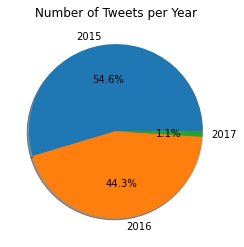

In [114]:
plt.pie(twitter_archive_clean['timestamp'].dt.year.value_counts(),labels=['2015','2016','2017'], shadow=True,autopct='%1.1f%%')
plt.title('Number of Tweets per Year')
plt.show;

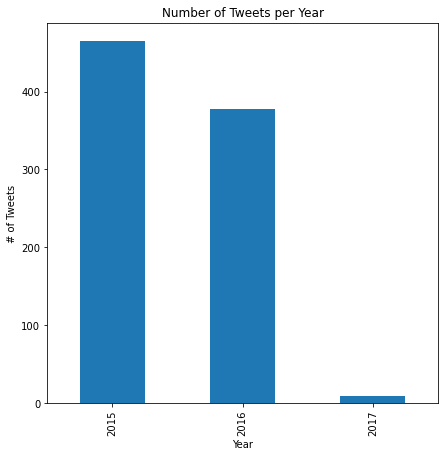

In [115]:
bar = twitter_archive_clean['timestamp'].dt.year.value_counts().plot(kind='bar',figsize=(7,7),title='Number of Tweets per Year')
bar.set_xlabel("Year")
bar.set_ylabel("# of Tweets");

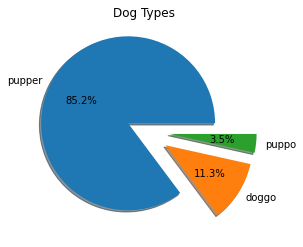

In [118]:
plt.pie(twitter_archive_clean['type'].value_counts(),labels=['pupper', 'doggo', 'puppo'], shadow=True,explode=(.2,.3,.3),autopct='%1.1f%%')
plt.title('Dog Types')
plt.show;

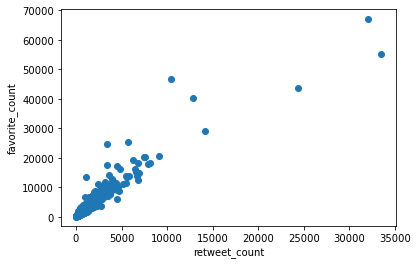

In [119]:
plt.scatter(twitter_archive_clean.retweet_count,twitter_archive_clean.favorite_count)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show();

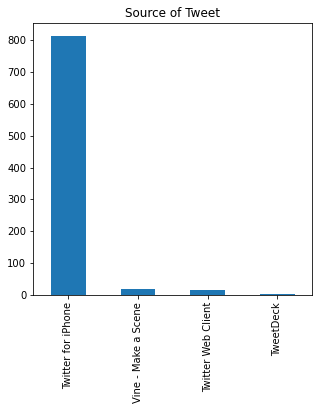

In [127]:
bar = twitter_archive_clean['source'].value_counts().plot(kind='bar',figsize=(5,5),title='Source of Tweet');